In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import tensorflow as tf
import numpy as np
import scipy
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa

from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from tensorflow.keras import layers
tf.keras.utils.get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
tf.keras.utils.model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import shutil
tf.keras.preprocessing.image.ImageDataGenerator
import random



loading the data

In [ ]:
train_df = pd.read_csv("/content/train_data.txt",
                       engine="python",
                       sep=" ::: ",
                       names=["id", "movie", "genre", "summary"])

test_df_solution = pd.read_csv("/content/test_data_solution.txt",
                      engine="python",
                      sep=" ::: ",
                      names=["id", "movie", "genre", "summary"])
train_df.dropna()
test_df_solution.dropna()

,id,movie,genre,summary
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink (2007),adult,"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard ..."


In [ ]:
###Renaming column

import pandas as pd
import matplotlib.pyplot as plt
# Read the training and test data
train_df = pd.read_csv('/content/train_data.txt', sep=":::", header=None, engine='python')
test_df_solution = pd.read_csv('/content/test_data_solution.txt', sep=":::", header=None, engine='python')

# Rename the columns
train_df.columns = ['id', 'title', 'genre', 'description']
test_df_solution.columns = ['id', 'title', 'genre', 'description']

print(train_df.head())

   id                               title       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer



num_words = 50000
max_len = 250

# Create and fit the tokenizer with description
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_df['description'].values)
X_train = tokenizer.texts_to_sequences(train_df['description'].values)

New Section

---
Clearning the data. we are removing any url , lowering all text to lower case , removing **number**


---



In [ ]:
# Convert text data to sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import Callback, EarlyStopping
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # Lowercase the text
    text = text.lower()


    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z']", ' ', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords and words with length <= 2
    stopwords_set = set(stopwords.words('english'))
    words = [word for word in words if word not in stopwords_set and len(word) > 2]

    # Join the cleaned words
    cleaned_text = ' '.join(words)

    return cleaned_text.strip()

train_df = pd.read_csv('/content/train_data.txt', sep=":::", header=None, engine='python')
test_df_solution = pd.read_csv('/content/test_data_solution.txt', sep=":::", header=None, engine='python')
train_df.columns=['id','title','genre','description']
test_df_solution.columns=['id','title','genre','description']
train_df.head()

train_df['Text_cleaning'] = train_df.description.apply(clean_text)
test_df_solution['Text_cleaning'] = test_df_solution.description.apply(clean_text)
test_df_solution.head()

train_df['length_Text_cleaning']=train_df['Text_cleaning'].apply(len)
train_df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,title,genre,description,Text_cleaning,length_Text_cleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...,383
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,119
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,400
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,744
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...,401


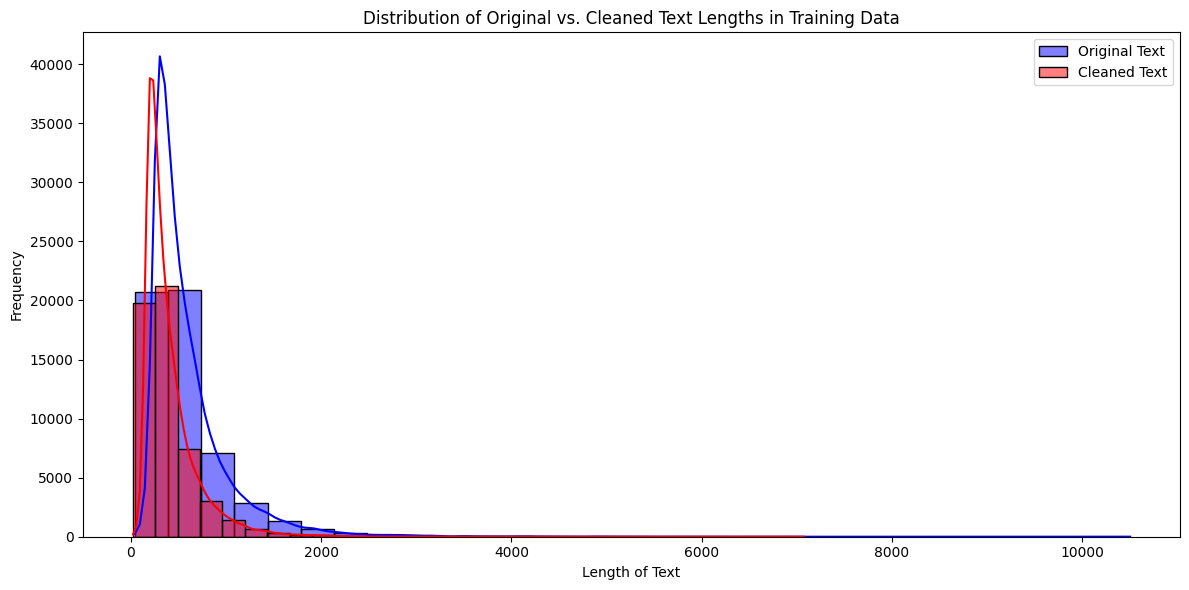

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of the original text
train_df['length_original'] = train_df['description'].apply(len)

# Plotting the distribution of original and cleaned text lengths
plt.figure(figsize=(12, 6))

sns.histplot(train_df['length_original'], color="blue", label='Original Text', bins=30, alpha=0.5, kde=True)
sns.histplot(train_df['length_Text_cleaning'], color="red", label='Cleaned Text', bins=30, alpha=0.5, kde=True)

plt.title('Distribution of Original vs. Cleaned Text Lengths in Training Data')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


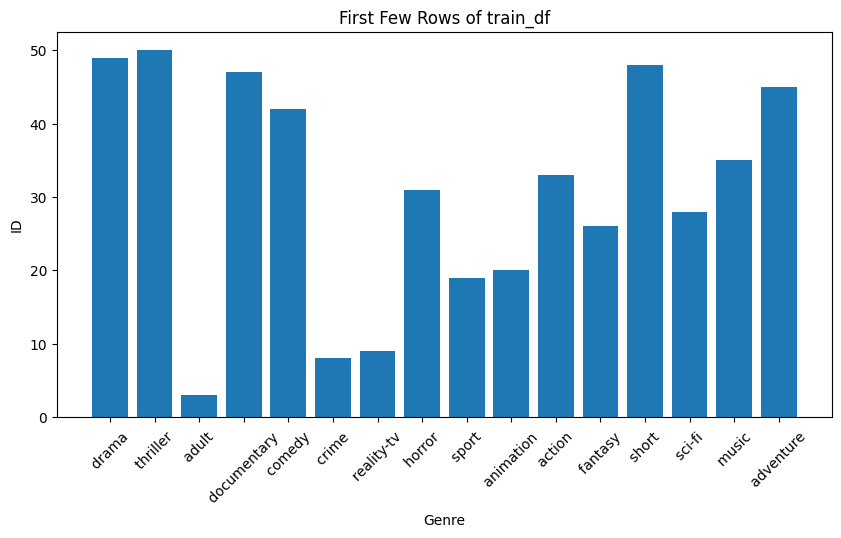

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the first few rows using a bar chart
plt.figure(figsize=(10, 5))
plt.bar(train_df['genre'][:50], train_df['id'][:50])
plt.xlabel('Genre')
plt.ylabel('ID')
plt.title('First Few Rows of train_df')
plt.xticks(rotation=45)
plt.show()



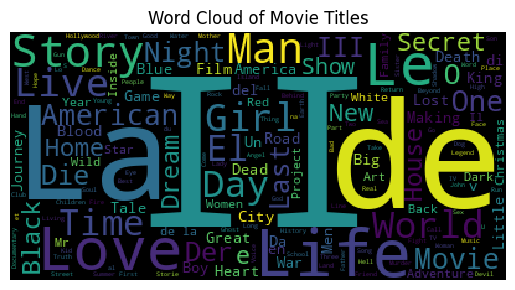

In [ ]:
from wordcloud import WordCloud
all_titles = ' '.join(train_df['title'].values)
wordcloud = WordCloud().generate(all_titles)
plt.imshow(wordcloud, interpolation='nearest')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()


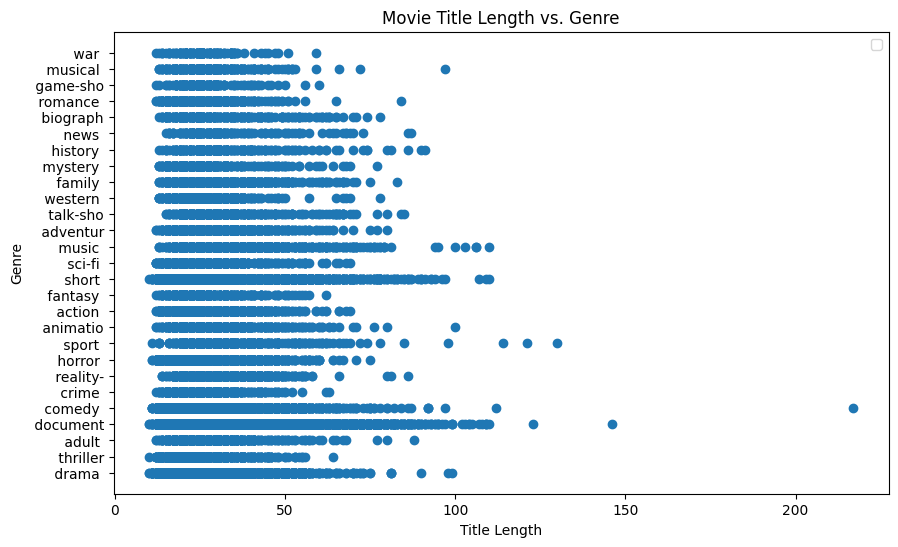

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df['title'].str.len(), train_df['genre'])
plt.xlabel('Title Length')
plt.ylabel('Genre')
plt.title('Movie Title Length vs. Genre')
plt.legend()
plt.show()


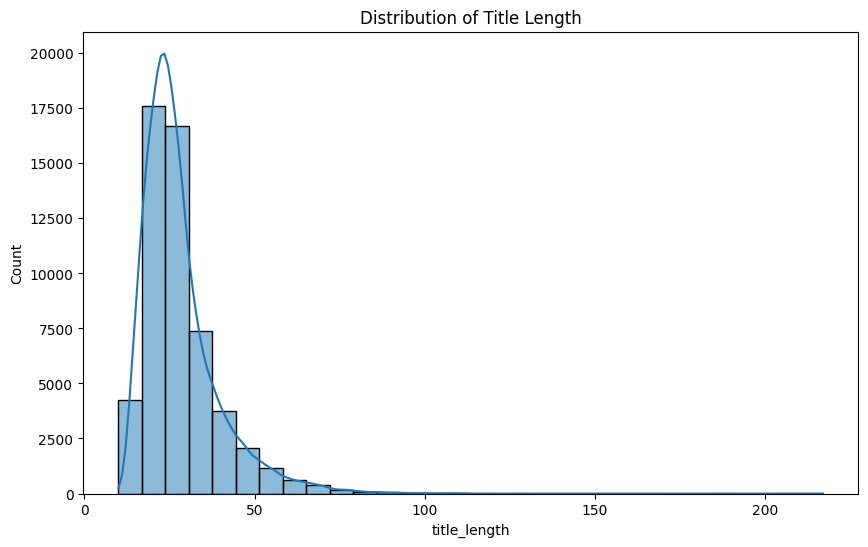

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = train_df[numerical_columns].corr()


train_df['title_length'] = train_df['title'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='title_length', bins=30, kde=True)
plt.title('Distribution of Title Length')
plt.show()

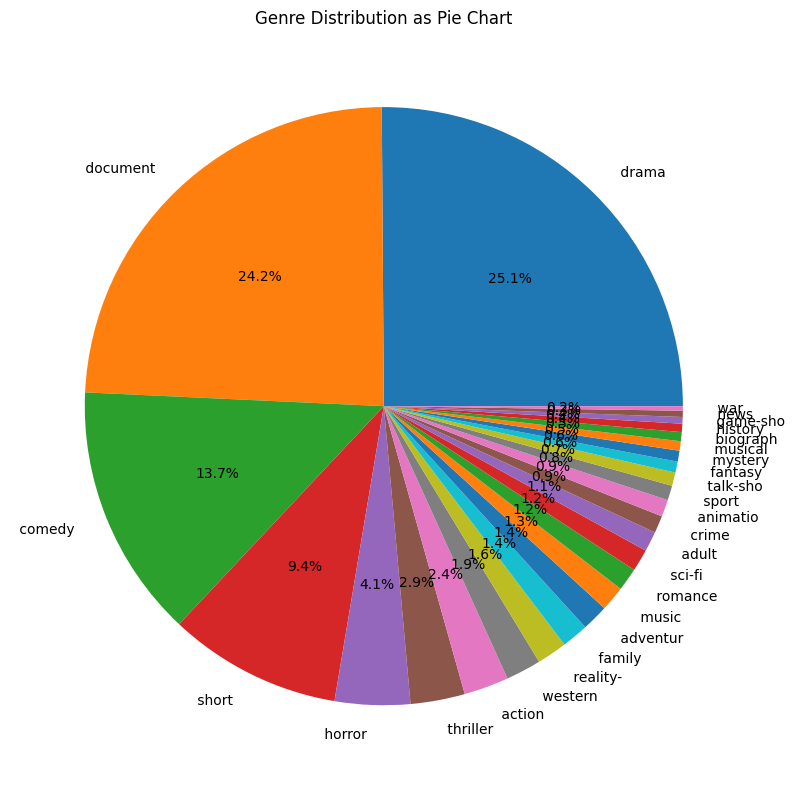

In [ ]:
plt.figure(figsize=(10, 8))
train_df['genre'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Genre Distribution as Pie Chart')
plt.ylabel('')  # Hide the y-label
plt.tight_layout()
plt.show()


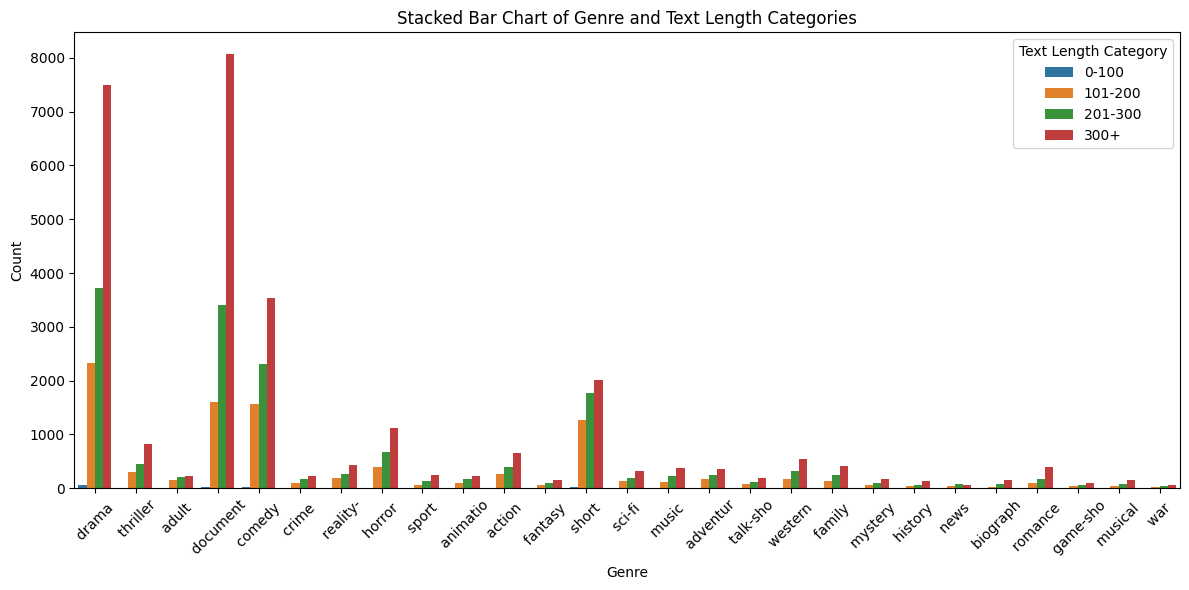

In [ ]:
# Categorize text lengths into bins
train_df['text_length_category'] = pd.cut(train_df['length_Text_cleaning'], bins=[0, 100, 200, 300, max(train_df['length_Text_cleaning'])], labels=['0-100', '101-200', '201-300', '300+'])

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='genre', hue='text_length_category')
plt.xticks(rotation=45)
plt.title('Stacked Bar Chart of Genre and Text Length Categories')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Text Length Category')
plt.tight_layout()
plt.show()


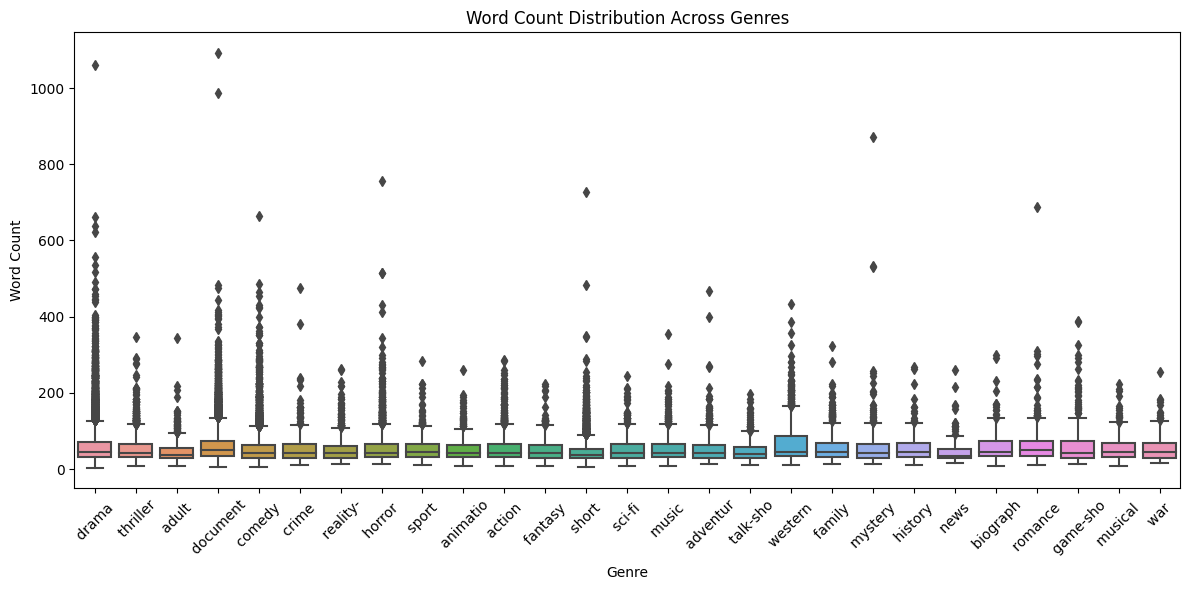

In [ ]:
# Word count
train_df['word_count'] = train_df['Text_cleaning'].apply(lambda x: len(x.split()))

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='genre', y='word_count')
plt.xticks(rotation=45)
plt.title('Word Count Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()


In [ ]:


train_shuffled = train_df.sample(frac=1)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_shuffled["description"],
                                                 train_shuffled["genre"],
                                                 test_size=0.1)
X_test, y_test = test_df_solution["description"], test_df_solution["genre"]







In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(train_df['description']).toarray()


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_df['genre'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# @title Default title text
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 40.67%

Classification Report:

              precision    recall  f1-score   support

           0       0.13      0.12      0.12       263
           1       0.26      0.16      0.20       112
           2       0.13      0.09      0.11       139
           3       0.11      0.07      0.08       104
           4       0.00      0.00      0.00        61
           5       0.31      0.23      0.26      1443
           6       0.17      0.04      0.06       107
           7       0.55      0.63      0.59      2659
           8       0.37      0.74      0.49      2697
           9       0.38      0.06      0.10       150
          10       0.20      0.01      0.03        74
          11       0.84      0.53      0.65        40
          12       0.20      0.02      0.04        45
          13       0.49      0.13      0.21       431
          14       0.55      0.25      0.34       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

n_classes = y_train.shape[1]

model = Sequential()
model.add(Dense(512, input_shape=(n_features,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))  #]

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model = Sequential()
model.add(Dense(512, input_shape=(n_features,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
\
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
epochs = 20
batch_size = 32

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,  \
                    verbose=1)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Epoch 1/20
1220/1220 [==============================] - 5s 4ms/step - loss: 1.7611 - accuracy: 0.5025 - val_loss: 1.4565 - val_accuracy: 0.5715
Epoch 2/20
1220/1220 [==============================] - 4s 3ms/step - loss: 1.3000 - accuracy: 0.6185 - val_loss: 1.4017 - val_accuracy: 0.5811
Epoch 3/20
1220/1220 [==============================] - 4s 3ms/step - loss: 1.0398 - accuracy: 0.6900 - val_loss: 1.4228 - val_accuracy: 0.5814
Epoch 4/20
1220/1220 [==============================] - 4s 3ms/step - loss: 0.7893 - accuracy: 0.7578 - val_loss: 1.5384 - val_accuracy: 0.5747
Epoch 5/20
1220/1220 [==============================] - 4s 3ms/step - loss: 0.5580 - accuracy: 0.8263 - val_loss: 1.7125 - val_accuracy: 0.5712
Epoch 6/20
1220/1220 [==============================] - 4s 3ms/step - loss: 0.3748 - accuracy: 0.8823 - val_loss: 1.9573 - val_accuracy: 0.5708
Epoch 7/20
1220/1220 [==============================] - 4s 3ms/step - loss: 0.2695 - accuracy: 0.9139 - val_loss: 2.1812 - val_accuracy: